In [1]:
"""To Predict the price of the Uber ride from a given pickup point to the agreed drop-off
location.
Perform following tasks:
1. Pre-process the dataset.
2. Identify outliers.
3. Check the correlation.
4. Implement linear regression and ridge, Lasso regression models.
5. Evaluate the models and compare their respective scores like R2, RMSE"""

'To Predict the price of the Uber ride from a given pickup point to the agreed drop-off\nlocation.\nPerform following tasks:\n1. Pre-process the dataset.\n2. Identify outliers.\n3. Check the correlation.\n4. Implement linear regression and ridge, Lasso regression models.\n5. Evaluate the models and compare their respective scores like R2, RMSE'

In [2]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [3]:
#Step 2: Load the Dataset
df=pd.read_csv("uber.csv")

In [4]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [5]:

# Drop missing values
df.dropna(inplace=True)

In [6]:
# Drop unnecessary columns
df.drop(['key', 'pickup_datetime'], axis=1, inplace=True)

In [7]:
df

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,7.5,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,7.7,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,12.9,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,5.3,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,16.0,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,42598914,3.0,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,7.5,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,30.9,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,14.5,-73.997124,40.725452,-73.983215,40.695415,1


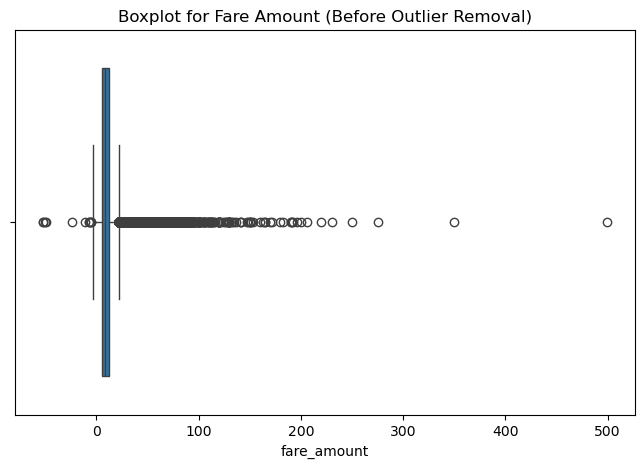

In [8]:
#Step 3: Identify Outliers

plt.figure(figsize=(8,5))
sns.boxplot(x=df['fare_amount'])
plt.title("Boxplot for Fare Amount (Before Outlier Removal)")
plt.show()

In [10]:
# Remove outliers: fare should be reasonable (0 < fare < 100)
df = df[(df['fare_amount'] > 0) & (df['fare_amount'] < 100)]

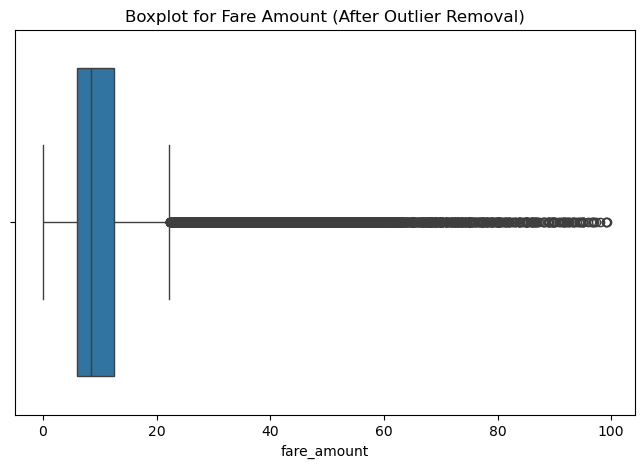

In [11]:
#after outlier remove
plt.figure(figsize=(8,5))
sns.boxplot(x=df['fare_amount'])
plt.title("Boxplot for Fare Amount (After Outlier Removal)")
plt.show()


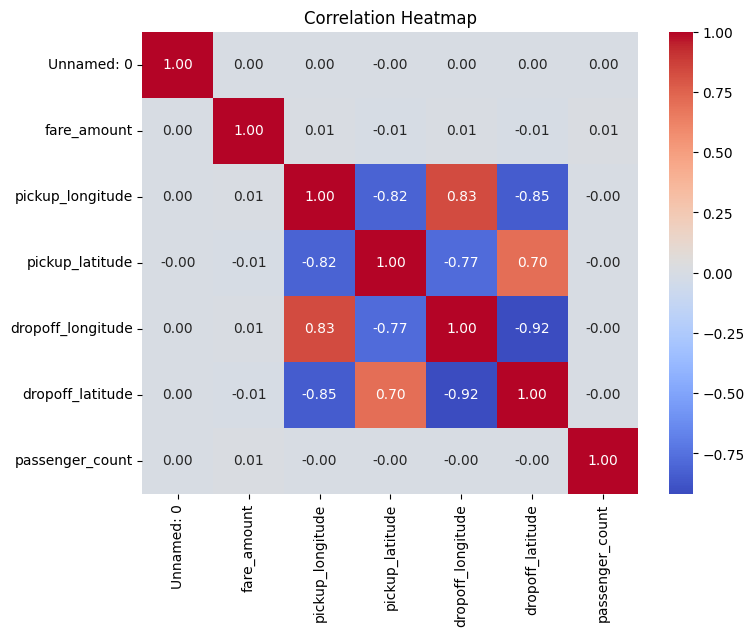

In [12]:
# Step 4: Check Correlation
# Step 4: Check Correlation
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [12]:
# Step 5: Split Dataset

X = df.drop('fare_amount', axis=1)
y = df['fare_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:

# Step 7: Implement Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)


In [15]:
# Step 8: Implement Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)



In [16]:
# Step 9: Implement Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)


In [17]:
# Step 10: Evaluate the Models
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{model_name} - R2 Score: {r2:.4f}, RMSE: {rmse:.4f}")

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")
evaluate_model(y_test, y_pred_lasso, "Lasso Regression")


Linear Regression - R2 Score: -0.0001, RMSE: 9.3434
Ridge Regression - R2 Score: -0.0001, RMSE: 9.3434
Lasso Regression - R2 Score: -0.0000, RMSE: 9.3428



Model Comparison:

               Model  R2 Score      RMSE
0  Linear Regression -0.000130  9.343379
1   Ridge Regression -0.000130  9.343379
2   Lasso Regression -0.000002  9.342779


C:\Users\HP\AppData\Local\Temp\ipykernel_12956\4274309867.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="R2 Score", data=results, palette="viridis")


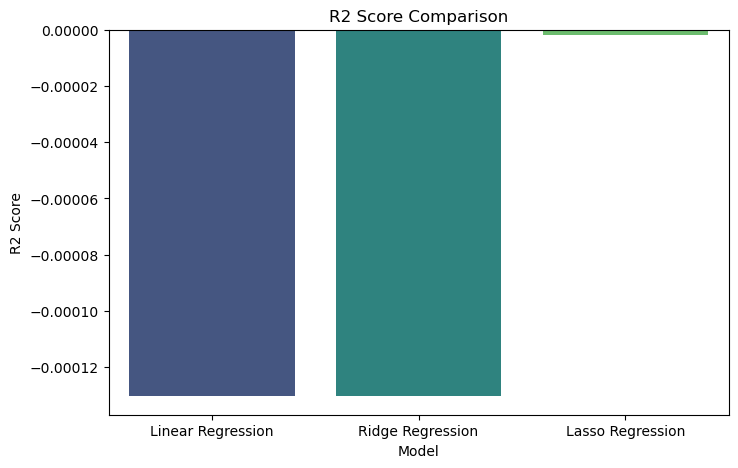

C:\Users\HP\AppData\Local\Temp\ipykernel_12956\4274309867.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="RMSE", data=results, palette="magma")


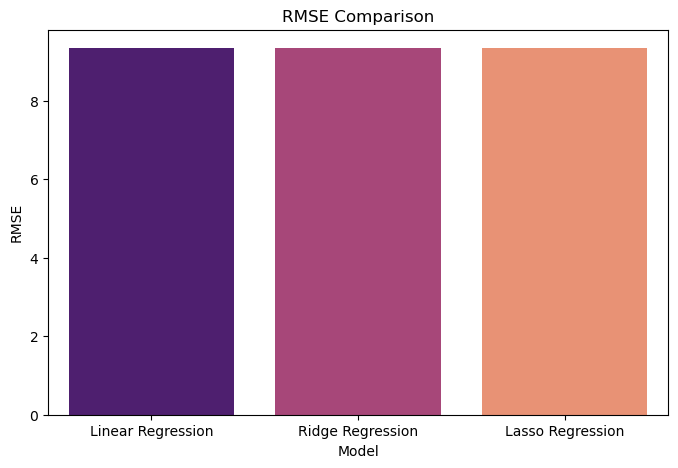

In [18]:
# Step 11: Compare Model Performance
results = pd.DataFrame({
    "Model": ["Linear Regression", "Ridge Regression", "Lasso Regression"],
    "R2 Score": [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_ridge),
        r2_score(y_test, y_pred_lasso)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred_lr)),
        np.sqrt(mean_squared_error(y_test, y_pred_ridge)),
        np.sqrt(mean_squared_error(y_test, y_pred_lasso))
    ]
})

print("\nModel Comparison:\n")
print(results)

plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="R2 Score", data=results, palette="viridis")
plt.title("R2 Score Comparison")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="RMSE", data=results, palette="magma")
plt.title("RMSE Comparison")
plt.show()
